In [1]:
!pip install -q pytorch-tabnet
!pip install -q --upgrade "s3fs>=2023.6.0"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.38.21 requires botocore==1.37.21, but you have botocore 1.37.1 which is incompatible.
boto3 1.37.21 requires botocore<1.38.0,>=1.37.21, but you have botocore 1.37.1 which is incompatible.


In [3]:
import pandas as pd

# Set the width to a large value
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)  # Ensure all columns are shown

In [15]:
# Clear unused variables
import gc
gc.collect()

!free -h

              total        used        free      shared  buff/cache   available
Mem:           124G         39G         82G         12M        2.6G         83G
Swap:            0B          0B          0B


In [1]:
import psutil
ram = psutil.virtual_memory()
print(f"Used: {ram.used / 1e9:.2f} GB")
print(f"Available: {ram.available / 1e9:.2f} GB")
print(f"Total: {ram.total / 1e9:.2f} GB")

Used: 1.81 GB
Available: 130.56 GB
Total: 133.52 GB


In [2]:
import pandas as pd
from tqdm import tqdm

# Paths to the data on S3
base_path = "s3://fireguarddata/data/preprocessed_data/"
paths = {
    #"train": f"{base_path}train.csv",
    "val": f"{base_path}val.csv",
    "test": f"{base_path}test.csv"
}

# Function to load data in chunks
def load_data_in_chunks(path, chunksize=1_000_000):
    chunks = []
    for chunk in tqdm(pd.read_csv(path, chunksize=chunksize, storage_options={"anon": False}), desc=f"Loading {path}"):
        chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

'''# Load Train, Validation, and Test sets
print("Loading Train Data...")
train_df = load_data_in_chunks(paths["train"])
print(f"Train Data Loaded: {train_df.shape}")'''

print("Loading Validation Data...")
val_df = load_data_in_chunks(paths["val"])
print(f"Validation Data Loaded: {val_df.shape}")

print("Loading Test Data...")
test_df = load_data_in_chunks(paths["test"])
print(f"Test Data Loaded: {test_df.shape}")

print("All data loaded and ready for evaluation.")


Loading Validation Data...


Loading s3://fireguarddata/data/preprocessed_data/val.csv: 9it [01:27,  9.69s/it]


Validation Data Loaded: (8054293, 30)
Loading Test Data...


Loading s3://fireguarddata/data/preprocessed_data/test.csv: 9it [01:24,  9.40s/it]


Test Data Loaded: (8054293, 30)
All data loaded and ready for evaluation.


In [6]:
train_df.head()

,latitude,longitude,u10,v10,sp,lai_hv,lai_lv,tvl,cl,swvl1,daynight,tvh,ie,d2m,t2m,tcc,tcrw,rsn,sd,tsn,slt,year,month,day,skt,wind_speed,wind_direction,fuel_load,fuel_availability,fire_occurrence
0,-1.854739,1.186848,1.913886,-0.261135,1.118435,1.541443,0.105153,0.358779,3.198913,0.405177,0.197106,-0.460135,-3.232466,0.716435,-0.090239,0.867815,-0.102781,-0.275318,-0.183884,0.086888,-0.852486,-1.154279,-1.209036,-0.471339,0.347115,1.280399,0.019511,1.322502,1.123581,0
1,-0.079326,-0.376767,0.267480,0.095035,1.531714,-0.566924,1.064474,0.169215,-0.195362,1.218112,0.197106,1.764457,0.597760,0.788592,-0.504912,1.750630,1.487017,-0.275318,-0.183884,0.087102,-0.852486,-1.154279,-1.832142,1.471559,-0.706624,-0.821879,0.217420,0.018410,-0.357045,0
2,0.387888,-0.083589,2.215039,0.314499,-1.622600,0.160309,1.840784,1.306600,0.250367,0.500081,0.197106,-0.460135,-0.829527,-0.727169,1.213544,-0.813935,-0.102781,-0.275318,-0.183884,0.086140,1.304566,0.444995,0.348730,1.471559,0.876439,1.681323,0.167036,0.974894,0.758136,1
3,-1.574411,1.284574,-0.226584,0.341623,-0.220243,0.835162,1.069541,1.306600,-0.340481,-0.755683,0.197106,-0.460135,0.457476,-0.503926,0.037021,-0.813935,-0.102781,-0.275318,-0.183884,-0.165154,-0.852486,1.404559,0.037177,1.471559,-0.000930,-1.077623,0.910134,1.179899,1.630340,1
4,-0.826868,0.405040,0.671729,-0.800230,0.970570,1.143510,-0.692320,0.358779,-0.390988,-0.833477,0.197106,1.625420,0.589908,0.634383,1.173046,0.011564,-0.102781,-0.275318,-0.183884,0.086247,1.304566,-0.834424,-0.274376,0.900119,0.496858,0.025605,-0.325659,0.628582,1.060474,0


In [3]:
'''X_train = train_df.drop(columns=["fire_occurrence"]).values
y_train = train_df["fire_occurrence"].values'''

X_val = val_df.drop(columns=["fire_occurrence"]).values
y_val = val_df["fire_occurrence"].values

X_test = test_df.drop(columns=["fire_occurrence"]).values
y_test = test_df["fire_occurrence"].values

print("Shapes of split datasets:")
'''print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")'''
print(f"X_val:   {X_val.shape}, y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}, y_test:  {y_test.shape}")

Shapes of split datasets:
X_val:   (8054293, 29), y_val:   (8054293,)
X_test:  (8054293, 29), y_test:  (8054293,)


In [ ]:
Downloading focal model

In [28]:
import s3fs
import tarfile
import joblib

# S3 Path to your focal loss model artifact
model_s3_path = "s3://fireguarddata/models/tabnet/pytorch-tabnet-training-focal/output/model.tar.gz"
local_path = "model.tar.gz"

# Download the model from S3
fs = s3fs.S3FileSystem(anon=False)
fs.get(model_s3_path, local_path)

# Extract the tar.gz file
with tarfile.open(local_path, "r:gz") as tar:
    tar.extractall(path="./")
print("Model extracted!")

# Load the extracted model
tabnet_focal_model = joblib.load("tabnet_model.pkl")
print("Model loaded successfully!")



Model extracted!
Model loaded successfully!


In [41]:
# Example of loading the correct model
model_path = "s3://fireguarddata/models/tabnet/pytorch-tabnet-training-focal/output/model.tar.gz"
local_path = "model.tar.gz"
fs.get(model_path, local_path)


[None]

In [42]:
balanced_path= "s3://fireguarddata/models/tabnet/pytorch-training-2025-03-30-06-45-49-350/output/model.tar.gz"
bal_local_path =  "model.tar.gz"
fs.get(balanced_path, bal_local_path)


[None]

In [ ]:
 Step 4: Check Model Object Differences
Load both models and inspect key attributes:

In [43]:
print("Balanced Model Params:", balanced_model.get_params())
print("Focal Model Params:", focal_model.get_params())


Balanced Model Params: {'cat_dims': [], 'cat_emb_dim': [], 'cat_idxs': [], 'clip_value': 1, 'device_name': 'cuda', 'epsilon': 1e-15, 'gamma': 1.3, 'grouped_features': [], 'input_dim': 29, 'lambda_sparse': 0.001, 'mask_type': 'entmax', 'momentum': 0.02, 'n_a': 8, 'n_d': 8, 'n_indep_decoder': 1, 'n_independent': 2, 'n_shared': 2, 'n_shared_decoder': 1, 'n_steps': 3, 'optimizer_fn': <class 'torch.optim.adam.Adam'>, 'optimizer_params': {'lr': 0.03}, 'output_dim': 2, 'scheduler_fn': None, 'scheduler_params': {}, 'seed': 0, 'verbose': 1}
Focal Model Params: {'cat_dims': [], 'cat_emb_dim': [], 'cat_idxs': [], 'clip_value': 1, 'device_name': 'cuda', 'epsilon': 1e-15, 'gamma': 1.3, 'grouped_features': [], 'input_dim': 29, 'lambda_sparse': 0.001, 'mask_type': 'entmax', 'momentum': 0.02, 'n_a': 8, 'n_d': 8, 'n_indep_decoder': 1, 'n_independent': 2, 'n_shared': 2, 'n_shared_decoder': 1, 'n_steps': 3, 'optimizer_fn': <class 'torch.optim.adam.Adam'>, 'optimizer_params': {'lr': 0.02}, 'output_dim': 2

### You can load the models from S3 and compare their predictions:

In [45]:
import joblib
import numpy as np

# Load Balanced model
balanced_model = joblib.load("tabnet_model.pkl")
# Load Focal model
focal_model = joblib.load("tabnet_focal_model.pkl")

# Evaluate on the test set
test_preds_balanced = balanced_model.predict_proba(X_test)
test_preds_focal = focal_model.predict_proba(X_test)

# Compare predictions
print("Are predictions identical?", np.array_equal(test_preds_balanced, test_preds_focal))

Are predictions identical? False


In [46]:
#compare predictions by confidence
diff = test_preds_balanced - test_preds_focal
print("Differences in predictions:", diff)

Differences in predictions: [[ 2.8123611e-01 -2.8123623e-01]
 [ 2.3841858e-07 -2.9774918e-07]
 [ 1.7024189e-01 -1.7024192e-01]
 ...
 [ 1.1638367e-01 -1.1638370e-01]
 [ 1.7491341e-02 -1.7491404e-02]
 [ 0.0000000e+00  7.0138856e-10]]


In [47]:
#analyzing important features
balanced_importance = balanced_model.feature_importances_
focal_importance = focal_model.feature_importances_
print("Feature importance comparison:", balanced_importance - focal_importance)

Feature importance comparison: [ 8.24587614e-02  8.14877282e-03  0.00000000e+00  2.12883120e-03
  6.61183988e-03  1.10998722e-02  1.28800162e-02  2.69968464e-04
  4.14562820e-03  1.98066460e-02  1.15489982e-01  1.48185496e-03
  0.00000000e+00  1.39713874e-02 -1.32486899e-03  2.84417366e-02
 -9.62479201e-02  8.40225599e-03  8.00902695e-03  0.00000000e+00
  0.00000000e+00 -3.16751686e-01  9.44958328e-02 -6.56139053e-03
  0.00000000e+00  0.00000000e+00 -1.66377278e-09  1.48391767e-03
  1.55953571e-03]


In [ ]:
retrieves models from local directory
generates predictions ypred and probailities yproba for the test dataset
calculates metrics (accuracy, auc, precision, recall, f1score)

In [49]:
import joblib
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Load models
balanced_model = joblib.load("tabnet_model.pkl")
focal_model = joblib.load("tabnet_focal_model.pkl")

# Predictions and probabilities
y_pred_balanced = balanced_model.predict(X_test)
y_proba_balanced = balanced_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

y_pred_focal = focal_model.predict(X_test)
y_proba_focal = focal_model.predict_proba(X_test)[:, 1]

# Metrics calculation
def evaluate_metrics(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
    }

balanced_metrics = evaluate_metrics(y_test, y_pred_balanced, y_proba_balanced)
focal_metrics = evaluate_metrics(y_test, y_pred_focal, y_proba_focal)

# Print metrics
print("Balanced Model Metrics:")
for metric, value in balanced_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nFocal Model Metrics:")
for metric, value in focal_metrics.items():
    print(f"{metric}: {value:.4f}")

Balanced Model Metrics:
Accuracy: 0.8692
AUC: 0.9409
Precision: 0.4682
Recall: 0.9525
F1 Score: 0.6278

Focal Model Metrics:
Accuracy: 0.8573
AUC: 0.9359
Precision: 0.4456
Recall: 0.9499
F1 Score: 0.6067


In [ ]:
Metrics

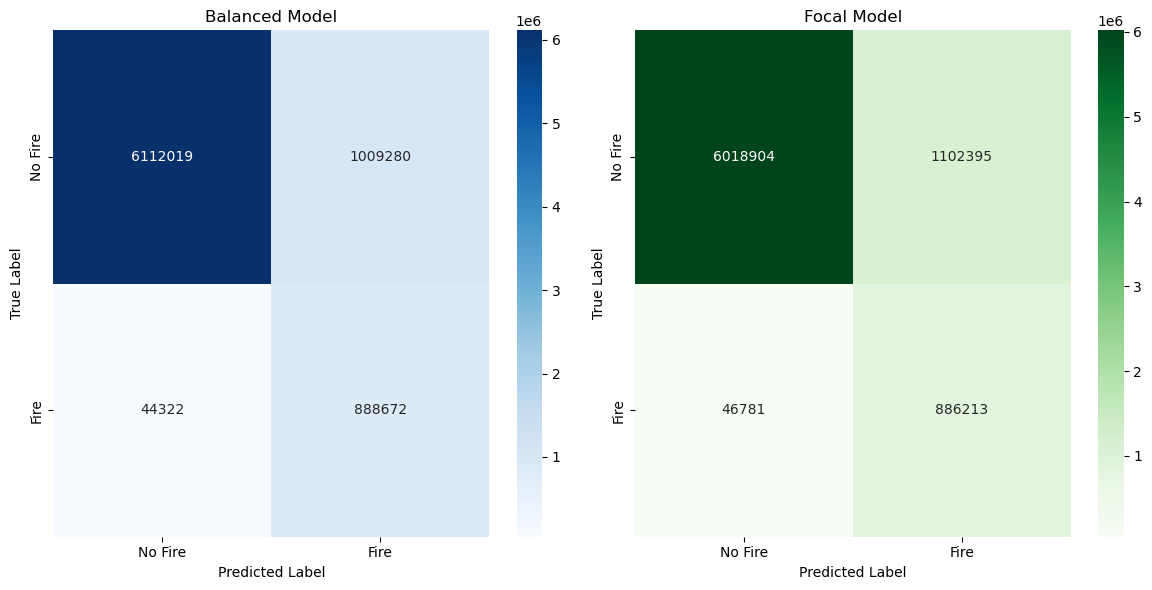

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Calculate confusion matrices
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
conf_matrix_focal = confusion_matrix(y_test, y_pred_focal)

# Define function for side-by-side confusion matrix plots
def plot_confusion_matrices(conf_matrix_1, conf_matrix_2, labels, title1="Balanced Model", title2="Focal Model"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot Balanced Model Confusion Matrix
    sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[0])
    axes[0].set_title(title1)
    axes[0].set_xlabel("Predicted Label")
    axes[0].set_ylabel("True Label")

    # Plot Focal Model Confusion Matrix
    sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels, ax=axes[1])
    axes[1].set_title(title2)
    axes[1].set_xlabel("Predicted Label")
    axes[1].set_ylabel("True Label")

    plt.tight_layout()
    plt.show()

# Call the plotting function
labels = ["No Fire", "Fire"]  # Replace with your actual class names
plot_confusion_matrices(conf_matrix_balanced, conf_matrix_focal, labels)

In [ ]:
Additional Metrics
If you'd like more detailed metrics (such as precision, recall, F1-score, and AUC), here’s how you can include them in a nicely formatted table:

In [51]:
import pandas as pd

# Generate metrics for each model
metrics_balanced = {
    "Accuracy": accuracy_score(y_test, y_pred_balanced),
    "AUC": roc_auc_score(y_test, y_proba_balanced),
    "Precision": precision_score(y_test, y_pred_balanced),
    "Recall": recall_score(y_test, y_pred_balanced),
    "F1 Score": f1_score(y_test, y_pred_balanced),
}

metrics_focal = {
    "Accuracy": accuracy_score(y_test, y_pred_focal),
    "AUC": roc_auc_score(y_test, y_proba_focal),
    "Precision": precision_score(y_test, y_pred_focal),
    "Recall": recall_score(y_test, y_pred_focal),
    "F1 Score": f1_score(y_test, y_pred_focal),
}

# Combine metrics into a DataFrame for display
metrics_df = pd.DataFrame([metrics_balanced, metrics_focal], index=["Balanced Model", "Focal Model"])
print(metrics_df)

                Accuracy       AUC  Precision    Recall  F1 Score
Balanced Model  0.869188  0.940872   0.468227  0.952495  0.627827
Focal Model     0.857321  0.935853   0.445645  0.949859  0.606662


In [ ]:
Step 1: Check Model File Names
After downloading the models from S3, print their names and contents:

In [38]:
import joblib

# Load both models and print basic info
balanced_model = joblib.load("tabnet_model.pkl")
focal_model = joblib.load("tabnet_focal_model.pkl")

print("Balanced Model:", balanced_model)
print("Focal Model:", focal_model)


Balanced Model: TabNetClassifier(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=[], n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.03}, scheduler_fn=None, scheduler_params={}, mask_type='entmax', input_dim=29, output_dim=2, device_name='cuda', n_shared_decoder=1, n_indep_decoder=1, grouped_features=[])
Focal Model: TabNetClassifier(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=[], n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.02}, scheduler_fn=None, scheduler_params={}, mask_type='entmax', input_dim=29, output_dim=2, device_name='cuda', n_shared_decoder=1, n_indep_decoder=1, grouped_features=[])


In [ ]:
Step 2: Check S3 File Paths
List all model files and ensure that the balanced and focal models have distinct filenames:

In [39]:
import s3fs

fs = s3fs.S3FileSystem(anon=False)
print(fs.ls("s3://fireguarddata/models/tabnet/"))


['fireguarddata/models/tabnet/pytorch-tabnet-training-focal', 'fireguarddata/models/tabnet/pytorch-training-2025-03-30-06-19-56-004', 'fireguarddata/models/tabnet/pytorch-training-2025-03-30-06-45-49-350', 'fireguarddata/models/tabnet/tabnet_focal_gamma2.5_alpha0.3.pkl', 'fireguarddata/models/tabnet/tabnet_sampled_focal.pkl', 'fireguarddata/models/tabnet/tabnet_sampled_model.pkl', 'fireguarddata/models/tabnet/tabnet_sampled_model_weights.pkl']


In [33]:
# Step 1: Make predictions on the test data
y_test_pred2 = tabnet_focal_model.predict(X_test)
y_test_proba2 = tabnet_focal_model.predict_proba(X_test)  # Probabilities for the positive class (fire)

print("Test predictions completed!")

Test predictions completed!



=== Test Data Evaluation ===
Confusion Matrix:
[[6112019 1009280]
 [  44322  888672]]


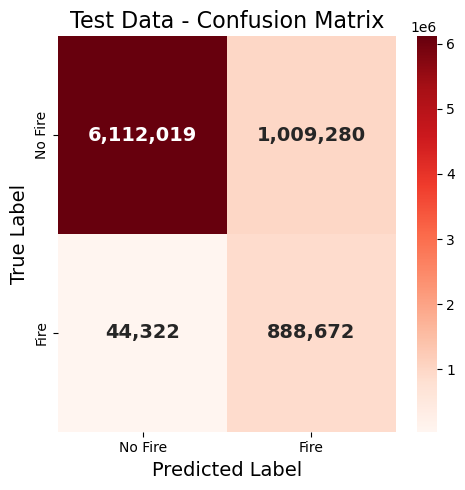


Classification Report:
              precision    recall  f1-score   support

           0     0.9928    0.8583    0.9206   7121299
           1     0.4682    0.9525    0.6278    932994

    accuracy                         0.8692   8054293
   macro avg     0.7305    0.9054    0.7742   8054293
weighted avg     0.9320    0.8692    0.8867   8054293

AUC: 0.9409


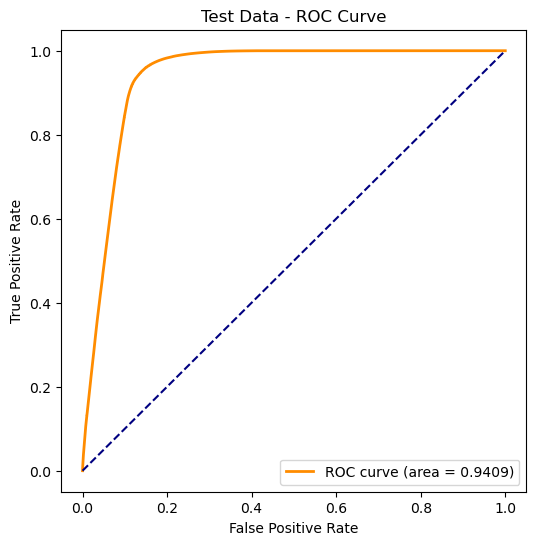

In [34]:
# Evaluate test predictions
evaluate_model(y_test, y_test_pred, y_test_proba, data_type="Test")

In [10]:
!aws s3 ls s3://fireguarddata/models/tabnet/ --recursive

2025-03-31 01:39:53        984 models/tabnet/pytorch-tabnet-training-focal/debug-output/collections/000000000/worker_0_collections.json
2025-03-31 01:40:07          0 models/tabnet/pytorch-tabnet-training-focal/debug-output/training_job_end.ts
2025-03-31 01:40:05     138573 models/tabnet/pytorch-tabnet-training-focal/output/model.tar.gz
2025-03-31 01:40:07          0 models/tabnet/pytorch-tabnet-training-focal/profiler-output/framework/training_job_end.ts
2025-03-30 16:36:01     521239 models/tabnet/pytorch-tabnet-training-focal/profiler-output/system/incremental/2025033016/1743352440.algo-1.json
2025-03-30 16:36:01    1641924 models/tabnet/pytorch-tabnet-training-focal/profiler-output/system/incremental/2025033016/1743352500.algo-1.json
2025-03-30 16:37:00    1641619 models/tabnet/pytorch-tabnet-training-focal/profiler-output/system/incremental/2025033016/1743352560.algo-1.json
2025-03-30 16:39:01    1637457 models/tabnet/pytorch-tabnet-training-focal/profiler-output/system/incrementa

In [35]:
import tarfile

with tarfile.open("model.tar.gz", "r:gz") as tar:
    tar.list()


-rw-r--r-- root/root     333467 2025-03-31 01:39:52 tabnet_focal_model.pkl 


In [36]:
print(tabnet_focal_model)


TabNetClassifier(n_d=8, n_a=8, n_steps=3, gamma=1.3, cat_idxs=[], cat_dims=[], cat_emb_dim=[], n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.001, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.03}, scheduler_fn=None, scheduler_params={}, mask_type='entmax', input_dim=29, output_dim=2, device_name='cuda', n_shared_decoder=1, n_indep_decoder=1, grouped_features=[])


In [37]:
diff model_focal.pth model_balanced.pth


SyntaxError: invalid syntax (4177110845.py, line 1)

In [11]:
print("Model Hyperparameters:", tabnet_focal_model.get_params())


Model Hyperparameters: {'cat_dims': [], 'cat_emb_dim': [], 'cat_idxs': [], 'clip_value': 1, 'device_name': 'cuda', 'epsilon': 1e-15, 'gamma': 1.3, 'grouped_features': [], 'input_dim': 29, 'lambda_sparse': 0.001, 'mask_type': 'entmax', 'momentum': 0.02, 'n_a': 8, 'n_d': 8, 'n_indep_decoder': 1, 'n_independent': 2, 'n_shared': 2, 'n_shared_decoder': 1, 'n_steps': 3, 'optimizer_fn': <class 'torch.optim.adam.Adam'>, 'optimizer_params': {'lr': 0.03}, 'output_dim': 2, 'scheduler_fn': None, 'scheduler_params': {}, 'seed': 0, 'verbose': 1}


In [29]:
def predict_with_tabnet(model, X):
    """
    Generate predictions and probabilities using a trained TabNet model.

    Parameters:
        model: The loaded TabNet model.
        X: Features (numpy array).

    Returns:
        y_pred: Predicted labels.
        y_proba: Predicted probabilities for class 1 (fire occurrence).
    """
    # Predict class labels (0 or 1)
    y_pred = model.predict(X)
    
    # Predict probabilities (probability of class 1, fire)
    y_proba = model.predict_proba(X)[:, 1]  # Extract the probability for class 1

    print(f"Predictions: {y_pred[:5]}")
    print(f"Probabilities: {y_proba[:5]}")
    return y_pred, y_proba


In [21]:
# Clear only the specified variables
del auc
del classification_report
del confusion_matrix
del evaluate_model
del fs
del joblib
del load_data_in_chunks
del paths
del predict_with_tabnet
del psutil
del roc_curve
del s3fs
del sns
del tabnet_focal_model
del tar
del tarfile
del y_test_pred
del y_test_proba
del y_val_pred
del y_val_proba

In [26]:
# Clear only the specified variables
del base_path


In [27]:
# List variables with details
%whos

Variable   Type         Data/Info
---------------------------------
X_test     ndarray      8054293x29: 233574497 elems, type `float64`, 1868595976 bytes (1782.0319900512695 Mb)
X_val      ndarray      8054293x29: 233574497 elems, type `float64`, 1868595976 bytes (1782.0319900512695 Mb)
np         module       <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pd         module       <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
ram        svmem        svmem(total=133518893056,<...>d=839680, slab=328069120)
test_df    DataFrame             latitude  longit<...>054293 rows x 30 columns]
tqdm       type         <class 'tqdm.std.tqdm'>
val_df     DataFrame             latitude  longit<...>054293 rows x 30 columns]
y_test     ndarray      8054293: 8054293 elems, type `int64`, 64434344 bytes (61.449378967285156 Mb)
y_val      ndarray      8054293: 8054293 elems, type `int64`, 64434344 bytes (61.44

In [30]:
# Training predictions
'''y_train_pred, y_train_proba = predict_with_tabnet(tabnet_focal_model, X_train) #ran on tabnet focal'''

'''# Validation predictions
y_val_pred, y_val_proba = predict_with_tabnet(tabnet_focal_model, X_val)'''

# test predictions
y_test_pred, y_test_proba = predict_with_tabnet(tabnet_focal_model, X_test)
print("Predictions for training and validation data complete!")


Predictions: [0 0 0 0 0]
Probabilities: [1.59963772e-01 1.10079775e-07 2.61139959e-01 4.40836302e-05
 7.26337102e-10]
Predictions for training and validation data complete!


In [31]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(y_true, y_pred, y_proba, data_type="Validation"):
    """
    Evaluate the model using confusion matrix, classification report, and ROC curve.

    Parameters:
        y_true: Ground truth labels.
        y_pred: Predicted labels.
        y_proba: Predicted probabilities for class 1 (fire).
        data_type: String to indicate the type of data (train/validation/test).
    """
    print(f"\n=== {data_type} Data Evaluation ===")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot with Seaborn
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt=',', cmap="Reds", cbar=True, annot_kws={"size": 14, "weight": "bold"}, 
                xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])

    plt.title(f"{data_type} Data - Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)
    plt.tight_layout()
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.4f}")

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{data_type} Data - ROC Curve")
    plt.legend(loc="lower right")
    plt.show()



=== Validation Data Evaluation ===
Confusion Matrix:
[[6111051 1010247]
 [  44186  888809]]


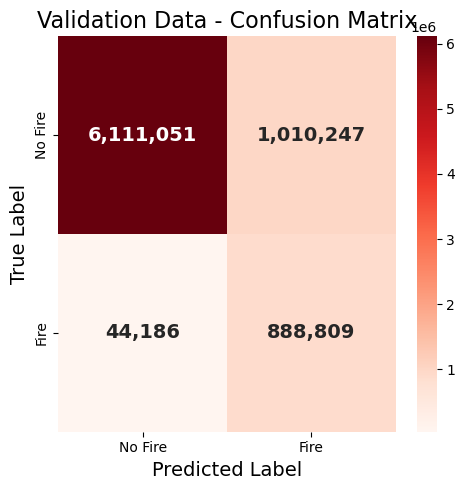


Classification Report:
              precision    recall  f1-score   support

           0     0.9928    0.8581    0.9206   7121298
           1     0.4680    0.9526    0.6277    932995

    accuracy                         0.8691   8054293
   macro avg     0.7304    0.9054    0.7741   8054293
weighted avg     0.9320    0.8691    0.8867   8054293

AUC: 0.9409


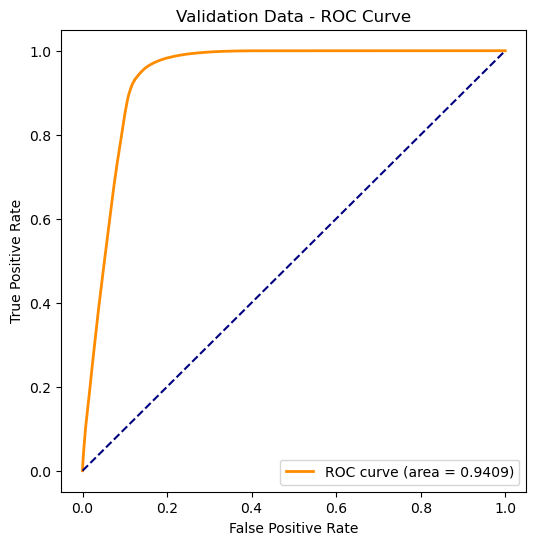

In [15]:
# Evaluate validation predictions
evaluate_model(y_val, y_val_pred, y_val_proba, data_type="Validation")


=== Test Data Evaluation ===
Confusion Matrix:
[[6112019 1009280]
 [  44322  888672]]


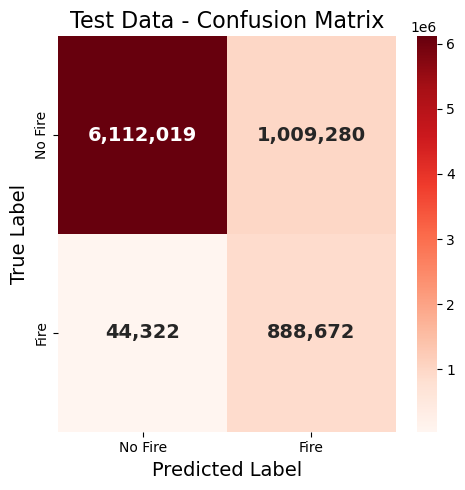


Classification Report:
              precision    recall  f1-score   support

           0     0.9928    0.8583    0.9206   7121299
           1     0.4682    0.9525    0.6278    932994

    accuracy                         0.8692   8054293
   macro avg     0.7305    0.9054    0.7742   8054293
weighted avg     0.9320    0.8692    0.8867   8054293

AUC: 0.9409


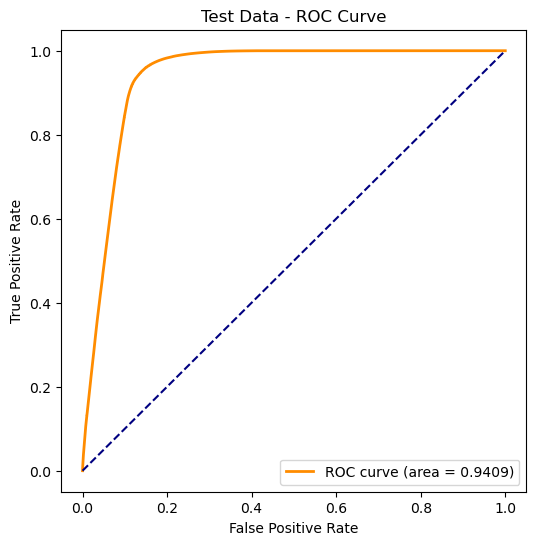

In [32]:
# Evaluate test predictions
evaluate_model(y_test, y_test_pred, y_test_proba, data_type="Test")